## Exploratory Data Analysis (EDA)

### Business Context:
This dataset pertains to residential properties in Ames, Iowa, and is aimed at modeling or predicting house sale prices. The goal of such a predictive model is to estimate the property's sale price based on various attributes such as location, size, condition, and amenities. This could be useful for:

- **Real Estate Valuation:** Real estate agencies and appraisers can use this model to estimate property values accurately, aiding in setting competitive listing prices.
- **Investment Analysis:** Investors can assess the potential profitability of buying, renovating, and selling properties by predicting future sale prices.
- **Buyer Assistance:** Helping potential buyers make informed decisions by providing estimated values for properties they are interested in.
Property Tax Assessment:** Local governments could use the model to estimate property values for more accurate property tax assessments.
- **Market Trend Analysis:** Identifying market trends and patterns in property prices across different neighborhoods and property types.
- **Customized Marketing:** Real estate companies can tailor marketing strategies based on property features and target suitable buyer segments.


### Packages and Libraries

In [1]:
import pandas as pd 
import pathlib
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

#https://medium.com/@prosun.csedu/polynomialfeatures-is-a-preprocessing-tool-provided-by-the-scikit-learn-library-in-python-that-is-84118adea049

### Read data

In [8]:
def read_file(file_name : str )  -> pd.DataFrame:
    """
    summary
    """
    try:
        dir_folder = pathlib.Path().cwd().parent
        print(dir_folder)
        file_path  = dir_folder / "data" 
        print(file_path)
        df = pd.read_csv(os.path.join(file_path/file_name))
        return df
    except FileNotFoundError:
        print(f"Error: The file at '{file_name}' was not found.")
        raise
    except Exception as e:
         print(f"An error occurred: {e}")
        
        
        
df = read_file('weatherAUS.csv')      
  
df.head()   





c:\Abdelouaheb\perso\Data_science_2024_projects\2025\machine_learning_project_Ames_House_Price
c:\Abdelouaheb\perso\Data_science_2024_projects\2025\machine_learning_project_Ames_House_Price\data


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### Data structure

In [3]:
def data_diagnostic(df):
        print("#"*50)
        print(df.info())
        print("#"*50)
        print("The number of total rows  {x: .0f} ".format(x=df.shape[0]))
        print("The number of total variables {x: .0f} ".format(x=df.shape[1]))
        print("The variables names {x:} ".format(x=list(df.columns.values)))

        column_headers =list(df.columns.values)
        qualitative_columns = [col for col in column_headers if df[col].dtype=="object"]
        quantitative_columns = [col for col in column_headers if df[col].dtype in ['int64', 'float64']]

        print("The qualitative variables {x:} ".format(x=qualitative_columns))
        print("The quantitative variables {x:} ".format(x=quantitative_columns))
        print("#"*50)
        print("Total number missing value {x:} ".format(x=df.isnull().sum()))

In [4]:
data_diagnostic(df)

##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 n

In [5]:
def na(df, percent = True, verbose = True):
    srs = df.isna().sum()[df.isna().sum() > 0]
    srs = srs.sort_values(ascending=False)
    if percent:
       if verbose:
           print('% of NaNs in df:')
       return srs / df.shape[0]
    else:
        if verbose:
           print('# of NaNs in df:')
        return srs

na(df, False)

# of NaNs in df:


Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
RainToday         1406
Rainfall          1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
dtype: int64

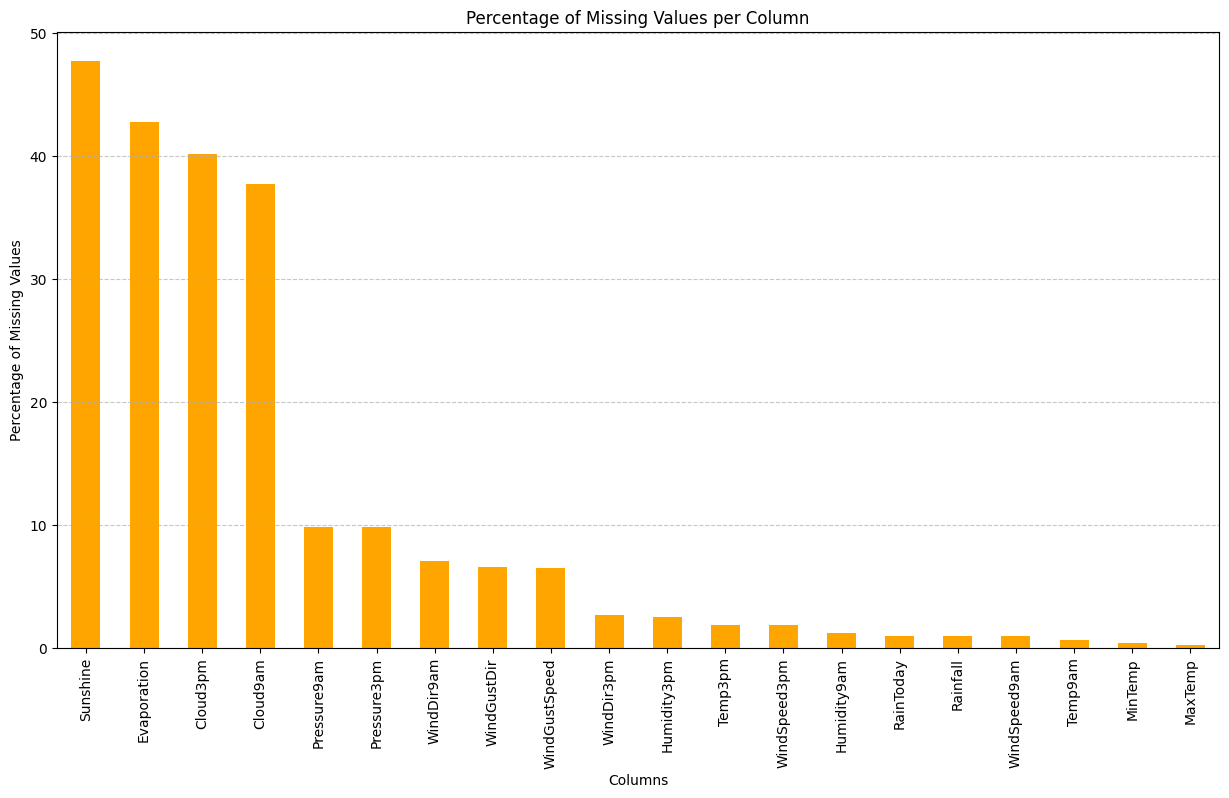

In [6]:
#Calculate the percentage of NaNs per column
na_percentage = (df.isna().sum() / len(df)) * 100

# Filter out columns with no missing values
na_percentage = na_percentage[na_percentage > 0]

# Sort by the percentage of missing values
na_percentage = na_percentage.sort_values(ascending=False)

# Plot the percentage of missing values
plt.figure(figsize=(15, 8))
na_percentage.plot(kind='bar', color='orange')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Analyse univary

#### Numerical varaiables

In [7]:
dtypes = df.dtypes.to_frame().reset_index()
dtypes.columns = ['col', 'dtype']
print('Df dtypes:')
dtypes.groupby('dtype').size()

Df dtypes:


dtype
float64    17
object      7
dtype: int64

In [8]:
def numeric_analysis(df):
        
    
        return print(df.describe().T)

In [9]:
numeric_analysis(df)

                  count         mean        std    min     25%     50%  \
MinTemp        141556.0    12.186400   6.403283   -8.5     7.6    12.0   
MaxTemp        141871.0    23.226784   7.117618   -4.8    17.9    22.6   
Rainfall       140787.0     2.349974   8.465173    0.0     0.0     0.0   
Evaporation     81350.0     5.469824   4.188537    0.0     2.6     4.8   
Sunshine        74377.0     7.624853   3.781525    0.0     4.9     8.5   
WindGustSpeed  132923.0    39.984292  13.588801    6.0    31.0    39.0   
WindSpeed9am   140845.0    14.001988   8.893337    0.0     7.0    13.0   
WindSpeed3pm   139563.0    18.637576   8.803345    0.0    13.0    19.0   
Humidity9am    140419.0    68.843810  19.051293    0.0    57.0    70.0   
Humidity3pm    138583.0    51.482606  20.797772    0.0    37.0    52.0   
Pressure9am    128179.0  1017.653758   7.105476  980.5  1012.9  1017.6   
Pressure3pm    128212.0  1015.258204   7.036677  977.1  1010.4  1015.2   
Cloud9am        88536.0     4.437189  

#### Numerical varaiables visualization

In [10]:
def univariate_analysis(df, base_folder="univariate_analysis"):
        # Ensure the base folder exists
        if not os.path.exists(base_folder):
            os.makedirs(base_folder)
        
        # Select numeric columns
        numeric_cols = df.select_dtypes(include=['number']).columns
        
        for col in numeric_cols:
            # Create a folder for the analysis
            col_folder = os.path.join(base_folder, col)
            if not os.path.exists(col_folder):
                os.makedirs(col_folder)
            
            print(f"\nPerforming Univariate Analysis for: {col}")
            
            # Create a single figure with 2x2 layout
            fig, axes = plt.subplots(2, 2, figsize=(12, 10))
            fig.suptitle(f'Univariate Analysis for {col}', fontsize=16)
            
            # Bar Chart
            sns.barplot(
                x=df[col].value_counts().index, 
                y=df[col].value_counts().values, 
                palette="viridis", 
                ax=axes[0, 0]
            )
            axes[0, 0].set_title('Bar Chart')
            axes[0, 0].set_xlabel(col)
            axes[0, 0].set_ylabel('Frequency')
            
            # Box Plot
            sns.boxplot(y=df[col], palette="viridis", ax=axes[0, 1])
            axes[0, 1].set_title('Box Plot')
            axes[0, 1].set_xlabel(col)
            
            # Density Plot
            sns.kdeplot(df[col], fill=True, color="blue", alpha=0.6, ax=axes[1, 0])
            axes[1, 0].set_title('Density Plot')
            axes[1, 0].set_xlabel(col)
            axes[1, 0].set_ylabel('Density')
            
            # Histogram
            sns.histplot(df[col], kde=False, color="green", ax=axes[1, 1])
            axes[1, 1].set_title('Histogram')
            axes[1, 1].set_xlabel(col)
            axes[1, 1].set_ylabel('Frequency')
            
            # Adjust layout
            plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
            
            # Save the combined plot
            combined_plot_path = os.path.join(col_folder, f"{col}_univariate_analysis.png")
            plt.savefig(combined_plot_path, bbox_inches='tight')
            plt.close()
            
            print(f"Combined plots for {col} saved in: {combined_plot_path}")

In [ ]:
univariate_analysis(df, base_folder="univariate_analysis")

#### Categorical varaiables

In [12]:
def categorical_analysis(df):
    return print(df.select_dtypes(include='object').describe().T)

In [13]:
categorical_analysis(df)
# Percentage

               count unique         top    freq
Date          142193   3436  2013-12-01      49
Location      142193     49    Canberra    3418
WindGustDir   132863     16           W    9780
WindDir9am    132180     16           N   11393
WindDir3pm    138415     16          SE   10663
RainToday     140787      2          No  109332
RainTomorrow  142193      2          No  110316


#### Categorical varaiables visualization

In [14]:
def univariate_analysis_categorical(df, base_folder="univariate_analysis_categorical"):
    # Ensure the base folder exists
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    # Select categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    for col in categorical_cols:
        # Create a folder for the analysis
        col_folder = os.path.join(base_folder, col)
        if not os.path.exists(col_folder):
            os.makedirs(col_folder)
        
        print(f"\nPerforming Univariate Analysis for: {col}")
        
        # Create a figure with 1x2 layout
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        fig.suptitle(f'Univariate Analysis for {col}', fontsize=16)
        
        # Bar Plot
        sns.countplot(x=df[col], palette="viridis", ax=axes[0])
        axes[0].set_title('Count Plot')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequency')
        axes[0].tick_params(axis='x', rotation=45)
        
        # Pie Chart
        df[col].value_counts().plot.pie(
            autopct='%1.1f%%', 
            colors=sns.color_palette("viridis", len(df[col].unique())), 
            ax=axes[1], 
            startangle=90
        )
        axes[1].set_title('Pie Chart')
        axes[1].set_ylabel('')  # Remove y-label for better visualization
        
        # Adjust layout
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
        
        # Save the combined plot
        combined_plot_path = os.path.join(col_folder, f"{col}_univariate_analysis.png")
        plt.savefig(combined_plot_path, bbox_inches='tight')
        plt.close()
        
        print(f"Combined plots for {col} saved in: {combined_plot_path}")


In [ ]:
univariate_analysis_categorical(df, base_folder="univariate_analysis_categorical")

### Multyvarie Analysis

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [3]:
target = 'RainTomorrow'

In [18]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

def multivariate_analysis(target, df, base_folder="multivariate_analysis", sample_frac=0.2):
    """
    Performs multivariate analysis with respect to the target variable.
    Outputs:
        - Categorical vs Target: Histograms with Density Curves separately by modality.
        - Numeric vs Target: Scatter plots with Density Curves separately by modality.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        target (str): The target variable for comparison.
        base_folder (str): Directory to save the analysis images.
        sample_frac (float): Fraction of data to sample for faster plotting.
    """
    # Ensure the base folder exists
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    # --- Categorical vs Target ---
    cat_vs_target_folder = os.path.join(base_folder, "categorical_vs_target")
    if not os.path.exists(cat_vs_target_folder):
        os.makedirs(cat_vs_target_folder)
    
    # Select categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    def plot_categorical_vs_target(col):
        print(f"\nAnalyzing Categorical vs Target: {target} vs {col}")
        
        # Create a grid of histograms by modality of the categorical variable
        modalities = df[col].unique()
        n_modalities = len(modalities)
        fig, axes = plt.subplots(1, n_modalities, figsize=(6 * n_modalities, 6), sharey=True)
        
        if n_modalities == 1:
            axes = [axes]  # To handle single modality case
        
        for i, modality in enumerate(modalities):
            subset = df[df[col] == modality]
            sns.histplot(
                subset[target], kde=True, ax=axes[i], alpha=0.6, color='skyblue'
            )
            axes[i].set_title(f'{col} = {modality}')
            axes[i].set_xlabel(target)
            axes[i].set_ylabel('Frequency')
        
        plt.suptitle(f'{target} Distribution by {col} (Separate by Modality)', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for main title
        
        # Save plot
        plot_path = os.path.join(cat_vs_target_folder, f"{target}_vs_{col}.png")
        plt.savefig(plot_path, bbox_inches='tight')
        plt.close()
        
        print(f"Categorical vs Target (Histograms) saved in: {plot_path}")
    
    # Parallelize the plotting for categorical vs target
    with ThreadPoolExecutor() as executor:
        executor.map(plot_categorical_vs_target, categorical_cols)
    
    # --- Numeric vs Target ---
    num_vs_target_folder = os.path.join(base_folder, "numeric_vs_target")
    if not os.path.exists(num_vs_target_folder):
        os.makedirs(num_vs_target_folder)
    
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['float64','int64']).columns
    
    def plot_numeric_vs_target(col):
        print(f"\nAnalyzing Numeric vs Target: {target} vs {col}")
        
        # Sample the data for faster plotting
        sampled_df = df.sample(frac=sample_frac, random_state=42)
        
        # Create a grid of scatter plots by modality of the target variable
        modalities = sampled_df[target].unique()
        n_modalities = len(modalities)
        fig, axes = plt.subplots(1, n_modalities, figsize=(6 * n_modalities, 6), sharey=True)
        
        if n_modalities == 1:
            axes = [axes]  # To handle single modality case
        
        for i, modality in enumerate(modalities):
            subset = sampled_df[sampled_df[target] == modality]
            sns.scatterplot(
                x=target, y=col, data=subset, ax=axes[i], alpha=0.4, color='purple'
            )
            sns.kdeplot(
                data=subset, x=target, y=col, ax=axes[i], color="red", levels=3, linewidths=1
            )
            axes[i].set_title(f'{target} = {modality}')
            axes[i].set_xlabel(target)
            axes[i].set_ylabel(col)
        
        plt.suptitle(f'{target} vs {col} (Scatter + Density by Modality)', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for main title
        
        # Save plot
        plot_path = os.path.join(num_vs_target_folder, f"{target}_vs_{col}.png")
        plt.savefig(plot_path, bbox_inches='tight')
        plt.close()
        
        print(f"Numeric vs Target (Scatter + Density) saved in: {plot_path}")
    
    # Parallelize the plotting for numeric vs target
    with ThreadPoolExecutor() as executor:
        executor.map(plot_numeric_vs_target, numeric_cols)


In [ ]:
multivariate_analysis(target,df,base_folder="multivariate_analysis")


Analyzing Categorical vs Target: RainTomorrow vs Date

Analyzing Categorical vs Target: RainTomorrow vs Location

Analyzing Categorical vs Target: RainTomorrow vs WindGustDir

Analyzing Categorical vs Target: RainTomorrow vs WindDir9am

Analyzing Categorical vs Target: RainTomorrow vs WindDir3pm

Analyzing Categorical vs Target: RainTomorrow vs RainToday

Analyzing Categorical vs Target: RainTomorrow vs RainTomorrow
Categorical vs Target (Histograms) saved in: multivariate_analysis\categorical_vs_target\RainTomorrow_vs_RainToday.png
Categorical vs Target (Histograms) saved in: multivariate_analysis\categorical_vs_target\RainTomorrow_vs_RainTomorrow.png
Categorical vs Target (Histograms) saved in: multivariate_analysis\categorical_vs_target\RainTomorrow_vs_WindDir3pm.png
Categorical vs Target (Histograms) saved in: multivariate_analysis\categorical_vs_target\RainTomorrow_vs_WindGustDir.png
Categorical vs Target (Histograms) saved in: multivariate_analysis\categorical_vs_target\RainTomo

### Multyvarie Analysis advanced

In [9]:
def scatter_plot_combinations(target, df, base_folder="scatter_combinations"):
    """
    Generates scatter plots for all possible combinations between the target variable,
    one categorical variable, and one numerical variable.
    Outputs:
        - Scatter plots showing the relationship between target and numerical variable,
          colored by the categories of the categorical variable.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        target (str): The target variable for comparison.
        base_folder (str): Directory to save the scatter plots.
    """
    # Ensure the base folder exists
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    # Select categorical and numeric columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    # Iterate through all combinations of categorical and numerical variables
    for cat_col in categorical_cols:
        if cat_col != target:  # Skip the target itself
            for num_col in numeric_cols:
                if num_col != target:  # Skip the target itself
                    print(f"\nCreating Scatter Plot: Target={target}, Categorical={cat_col}, Numerical={num_col}")
                    
                    # Plot
                    plt.figure(figsize=(10, 6))
                    sns.scatterplot(
                        x=num_col, 
                        y=target, 
                        hue=cat_col, 
                        data=df, 
                        palette="viridis", 
                        alpha=0.6
                    )
                    plt.title(f'{target} vs {num_col} by {cat_col}')
                    plt.xlabel(num_col)
                    plt.ylabel(target)
                    plt.legend(title=cat_col)
                    
                    # Save plot
                    plot_folder = os.path.join(base_folder, f"{target}_vs_{num_col}_by_{cat_col}")
                    if not os.path.exists(plot_folder):
                        os.makedirs(plot_folder)
                    plot_path = os.path.join(plot_folder, f"{target}_vs_{num_col}_by_{cat_col}.png")
                    plt.savefig(plot_path, bbox_inches='tight')
                    plt.close()
                    
                    print(f"Scatter Plot saved in: {plot_path}")


In [ ]:
scatter_plot_combinations(target, df, base_folder="scatter_combinations")

#### Correlation matrix

In [11]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr
import numpy as np

def correlation_and_significance(df, base_folder="correlation_analysis"):
    """
    Generates a correlation matrix heatmap with significance markers.
    Outputs:
        - Correlation Matrix with significance points (red = not significant, green = significant)
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        base_folder (str): Directory to save the analysis images.
    """
    # Ensure the base folder exists
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    # Select only numerical columns
    numeric_df = df.select_dtypes(include=['number'])
    cols = numeric_df.columns
    
    # Calculate the correlation matrix
    corr_matrix = numeric_df.corr()
    
    # Initialize p-value matrix
    p_values = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)
    
    # Calculate p-values for each pair of variables
    for row in cols:
        for col in cols:
            if row != col:
                _, p_value = pearsonr(numeric_df[row], numeric_df[col])
                p_values.loc[row, col] = p_value
    
    # --- Plot Correlation Matrix with Significance ---
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    
    # Add significance markers
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:  # Skip diagonal
                p_val = p_values.iloc[i, j]
                x = j + 0.5
                y = i + 0.5
                
                # Significant if p-value < 0.05
                if p_val < 0.05:
                    plt.plot(x, y, 'o', color='green')  # Green for significant
                else:
                    plt.plot(x, y, 'o', color='red')    # Red for not significant
    
    plt.title('Correlation Matrix with Significance (Numerical Variables)', fontsize=18)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    
    # Save Correlation Matrix with Significance
    corr_plot_path = os.path.join(base_folder, "correlation_matrix_significance.png")
    plt.savefig(corr_plot_path, bbox_inches='tight')
    plt.close()
    
    print(f"Correlation matrix with significance saved in: {corr_plot_path}")


In [12]:
# Assuming df is your DataFrame
correlation_and_significance(df=df)

Correlation matrix with significance saved in: correlation_analysis\correlation_matrix_significance.png


### Data Cleaning

#### Handling missing values

#### Removing duplicates rows


#### Handles outliers

#### Data type conversions

#### feature eng

#### Target Variable

#### Data split
